<a href="https://colab.research.google.com/github/maa929/4105/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
import torch
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [244]:
def linModel(t_u, w, b):
  return w * t_u + b

In [245]:
def linModel2(tx, w5, w4, w3, w2, w1, b):
  return torch.matmul(tx, params[:-1].double()) + params[-1].double()

In [246]:
def linModel3(tx, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b):
  return torch.matmul(tx, params[:-1].double()) + params[-1].double()

In [247]:
def nonlinModel(t_u, w2, w1, b):
  return w2 * t_u**2 + w1 * t_u + b

In [248]:
def loss(t_p, t_c):
  squared_diffs = (t_p - t_c) **2
  return squared_diffs.mean()

In [249]:
def nonlinTrainLoop(n_epochs, nonlinOpt, nonlinParams, tu_train, tc_train, tu_val, tc_val):
    for epoch in range(1, n_epochs + 1):
        tp_train = nonlinModel(tu_train, *nonlinParams)
        tp_val = nonlinModel(tu_val, *nonlinParams)
        t_loss = loss(tp_train, tc_train)
        v_loss = loss(tp_val, tc_val)
        nonlinOpt.zero_grad()
        t_loss.backward()
        nonlinOpt.step()
        if epoch % 500 == 0:
          print(f'Epochs: {epoch}, \tTraining Loss: {t_loss:.6f}, \tValidation Loss: {v_loss:.6f}\n')
    return params

In [250]:
def linTrainLoop(n_epochs, linOpt, linParams, tu_train, tc_train, tu_val, tc_val):
    for epoch in range(1, n_epochs + 1):
        tp_train = linModel(tu_train, *linParams)
        tp_val = linModel(tu_val, *linParams)
        t_loss = loss(tp_train, tc_train)
        v_loss = loss(tp_val, tc_val)
        linOpt.zero_grad()
        t_loss.backward()
        linOpt.step()
        if epoch % 500 == 0:
          print(f'Epochs: {epoch}, \tTraining Loss: {t_loss:.6f}, \tValidation Loss: {v_loss:.6f}\n')
    return params

In [251]:
def linTrainLoop2(n_epochs, optimizer, params, tx_train, tx_val, ty_train, ty_val):
  t_losses = []
  v_losses = []
  for epoch in range (1, n_epochs + 1):
    tp_train = linModel2(tx_train, *params)
    tp_val = linModel2(tx_val, *params)
    t_loss = loss(tp_train, ty_train)
    v_loss = loss(tp_val, ty_val)
    optimizer.zero_grad()
    t_loss.backward()
    optimizer.step()
    t_losses.append(t_loss)
    v_losses.append(v_loss)
    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {t_loss:.6f}, \tValidation Loss: {v_loss:.6f}\n')
  return params, t_losses, v_losses

In [252]:
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

In [253]:
def linTrainLoop3(n_epochs, optimizer, params, tx_train, tx_val, ty_train, ty_val):
  t_losses = []
  v_losses = []
  for epoch in range (1, n_epochs + 1):
    tp_train = linModel3(tx_train, *params)
    tp_val = linModel3(tx_val, *params)
    t_loss = loss(tp_train, ty_train)
    v_loss = loss(tp_val, ty_val)
    optimizer.zero_grad()
    t_loss.backward()
    optimizer.step()
    t_losses.append(t_loss)
    v_losses.append(v_loss)
    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {t_loss:.6f}, \tValidation Loss: {v_loss:.6f}\n')
  return params, t_losses, v_losses

In [254]:
tc = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
tu = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
tc = torch.tensor(tc)
tu = torch.tensor(tu)
n_sam = tu.shape[0]
n_val = int(0.2 * n_sam)
shuf_ind = torch.randperm(n_sam)
train_ind = shuf_ind[:-n_val]
val_ind = shuf_ind[-n_val]
tu_train = tu[train_ind]
tun_train = 0.1 * tu_train
tc_train = tc[train_ind]
tu_val = tu[val_ind]
tun_val = 0.1 * tu_val
tc_val = tc[val_ind]
w2 = torch.ones(())
w1 = torch.ones(())
b = torch.zeros(())
nonlinParams = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
nonlinOpt = optim.SGD([nonlinParams], lr = 0.0001)
nonlinTrainLoop(5000, nonlinOpt, nonlinParams, tun_train, tc_train, tun_val, tc_val)

Epochs: 500, 	Training Loss: 11.173402, 	Validation Loss: 12.307023

Epochs: 1000, 	Training Loss: 8.437923, 	Validation Loss: 10.996703

Epochs: 1500, 	Training Loss: 6.601347, 	Validation Loss: 9.977838

Epochs: 2000, 	Training Loss: 5.367880, 	Validation Loss: 9.179645

Epochs: 2500, 	Training Loss: 4.539062, 	Validation Loss: 8.550154

Epochs: 3000, 	Training Loss: 3.981743, 	Validation Loss: 8.050722

Epochs: 3500, 	Training Loss: 3.606580, 	Validation Loss: 7.652385

Epochs: 4000, 	Training Loss: 3.353641, 	Validation Loss: 7.333172

Epochs: 4500, 	Training Loss: 3.182707, 	Validation Loss: 7.076320

Epochs: 5000, 	Training Loss: 3.066798, 	Validation Loss: 6.868933



tensor([0.2963, 0.0499, 0.2607, 0.2210, 0.0736, 0.0709, 0.1072, 0.1024, 0.2064,
        0.1582, 0.1383, 0.0019], requires_grad=True)

In [255]:
nonlinOpt = optim.Adam([nonlinParams], lr = 0.0001)
nonlinTrainLoop(5000, nonlinOpt, nonlinParams, tun_train, tc_train, tun_val, tc_val)

Epochs: 500, 	Training Loss: 2.982283, 	Validation Loss: 6.676049

Epochs: 1000, 	Training Loss: 2.918862, 	Validation Loss: 6.523447

Epochs: 1500, 	Training Loss: 2.872367, 	Validation Loss: 6.387843

Epochs: 2000, 	Training Loss: 2.839188, 	Validation Loss: 6.267866

Epochs: 2500, 	Training Loss: 2.816014, 	Validation Loss: 6.168821

Epochs: 3000, 	Training Loss: 2.799694, 	Validation Loss: 6.087346

Epochs: 3500, 	Training Loss: 2.787259, 	Validation Loss: 6.027736

Epochs: 4000, 	Training Loss: 2.776213, 	Validation Loss: 5.988848

Epochs: 4500, 	Training Loss: 2.764967, 	Validation Loss: 5.967218

Epochs: 5000, 	Training Loss: 2.752944, 	Validation Loss: 5.954887



tensor([0.2963, 0.0499, 0.2607, 0.2210, 0.0736, 0.0709, 0.1072, 0.1024, 0.2064,
        0.1582, 0.1383, 0.0019], requires_grad=True)

In [256]:
linParams = torch.tensor([1.0, 0.0], requires_grad = True)
linOpt = optim.SGD([linParams], lr = 0.0001)
linTrainLoop(5000, linOpt, linParams, tu_train, tc_train, tu_val, tc_val)

Epochs: 500, 	Training Loss: 31.201504, 	Validation Loss: 38.809483

Epochs: 1000, 	Training Loss: 30.633375, 	Validation Loss: 38.304077

Epochs: 1500, 	Training Loss: 30.076677, 	Validation Loss: 37.807026

Epochs: 2000, 	Training Loss: 29.531166, 	Validation Loss: 37.318207

Epochs: 2500, 	Training Loss: 28.996620, 	Validation Loss: 36.837452

Epochs: 3000, 	Training Loss: 28.472822, 	Validation Loss: 36.364624

Epochs: 3500, 	Training Loss: 27.959551, 	Validation Loss: 35.899567

Epochs: 4000, 	Training Loss: 27.456598, 	Validation Loss: 35.442173

Epochs: 4500, 	Training Loss: 26.963764, 	Validation Loss: 34.992290

Epochs: 5000, 	Training Loss: 26.480831, 	Validation Loss: 34.549778



tensor([0.2963, 0.0499, 0.2607, 0.2210, 0.0736, 0.0709, 0.1072, 0.1024, 0.2064,
        0.1582, 0.1383, 0.0019], requires_grad=True)

In [257]:
linOpt = optim.Adam([linParams], lr = 0.0001)
linTrainLoop(5000, linOpt, linParams, tu_train, tc_train, tu_val, tc_val)

Epochs: 500, 	Training Loss: 26.325912, 	Validation Loss: 34.399330

Epochs: 1000, 	Training Loss: 26.172365, 	Validation Loss: 34.258152

Epochs: 1500, 	Training Loss: 26.019508, 	Validation Loss: 34.117409

Epochs: 2000, 	Training Loss: 25.867296, 	Validation Loss: 33.977013

Epochs: 2500, 	Training Loss: 25.715647, 	Validation Loss: 33.837284

Epochs: 3000, 	Training Loss: 25.564642, 	Validation Loss: 33.702236

Epochs: 3500, 	Training Loss: 25.414183, 	Validation Loss: 33.558033

Epochs: 4000, 	Training Loss: 25.264229, 	Validation Loss: 33.419277

Epochs: 4500, 	Training Loss: 25.114769, 	Validation Loss: 33.278469

Epochs: 5000, 	Training Loss: 24.965816, 	Validation Loss: 33.142742



tensor([0.2963, 0.0499, 0.2607, 0.2210, 0.0736, 0.0709, 0.1072, 0.1024, 0.2064,
        0.1582, 0.1383, 0.0019], requires_grad=True)

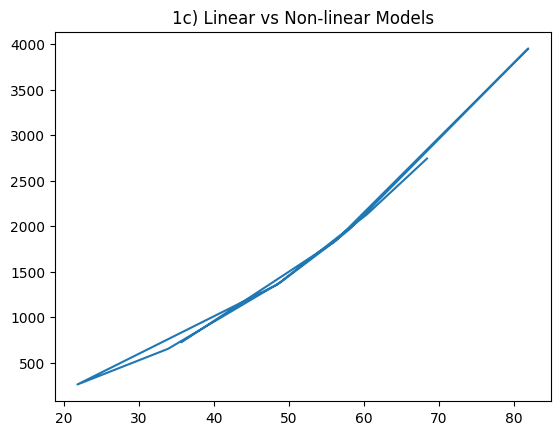

In [270]:
lin_tp = linModel(tu, *linParams).detach().numpy()
nonlin_tp = nonlinModel(tu, *nonlinParams).detach().numpy()
plt.plot(tu, nonlin_tp)
plt.title('1c) Linear vs Non-linear Models')
plt.show()

In [259]:
file = 'https://raw.githubusercontent.com/maa929/4105/main/Housing.csv'
ds = pd.DataFrame(pd.read_csv(file))
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
ds[varlist] = ds[varlist].apply(binary_map)

In [260]:
inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
x = ds[inputs].values
y = ds['price'].values
scX = StandardScaler().fit_transform(x)
scY = StandardScaler().fit_transform(y.reshape(-1,1)).flatten()
tx = torch.tensor(scX)
ty = torch.tensor(scY)
n_sam = tx.shape[0]
n_val = int(0.2 * n_sam)
shuf_ind = torch.randperm(n_sam)
train_ind = shuf_ind[:-n_val]
val_ind = shuf_ind[-n_val]
tx_train = tx[train_ind]
ty_train = ty[train_ind]
tx_val = tx[val_ind]
ty_val = ty[val_ind]
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.0001)
model, t_losses, v_losses  = linTrainLoop2(5000, optimizer, params, tx_train, tx_val, ty_train, ty_val)
SGD_tl = np.array([item.detach().item() for item in t_losses])
SGD_vl = np.array([item.detach().item() for item in v_losses])

Epochs: 500, 	Training Loss: 4.408016, 	Validation Loss: 9.368097

Epochs: 1000, 	Training Loss: 3.079155, 	Validation Loss: 7.020363

Epochs: 1500, 	Training Loss: 2.197437, 	Validation Loss: 5.338321

Epochs: 2000, 	Training Loss: 1.611936, 	Validation Loss: 4.122114

Epochs: 2500, 	Training Loss: 1.222727, 	Validation Loss: 3.234169

Epochs: 3000, 	Training Loss: 0.963657, 	Validation Loss: 2.579270

Epochs: 3500, 	Training Loss: 0.790911, 	Validation Loss: 2.091160

Epochs: 4000, 	Training Loss: 0.675466, 	Validation Loss: 1.723445

Epochs: 4500, 	Training Loss: 0.598093, 	Validation Loss: 1.443402

Epochs: 5000, 	Training Loss: 0.546044, 	Validation Loss: 1.227794



In [261]:
optimizer = optim.Adam([params], lr=0.0001)
model, t_losses, v_losses  = linTrainLoop2(5000, optimizer, params, tx_train, tx_val, ty_train, ty_val)
adam_tl = np.array([item.detach().item() for item in t_losses])
adam_vl = np.array([item.detach().item() for item in v_losses])

Epochs: 500, 	Training Loss: 0.476854, 	Validation Loss: 0.898413

Epochs: 1000, 	Training Loss: 0.449585, 	Validation Loss: 0.669177

Epochs: 1500, 	Training Loss: 0.438437, 	Validation Loss: 0.516450

Epochs: 2000, 	Training Loss: 0.432502, 	Validation Loss: 0.413790

Epochs: 2500, 	Training Loss: 0.429264, 	Validation Loss: 0.344190

Epochs: 3000, 	Training Loss: 0.427752, 	Validation Loss: 0.298043

Epochs: 3500, 	Training Loss: 0.427190, 	Validation Loss: 0.269515

Epochs: 4000, 	Training Loss: 0.427037, 	Validation Loss: 0.253861

Epochs: 4500, 	Training Loss: 0.427009, 	Validation Loss: 0.246659

Epochs: 5000, 	Training Loss: 0.427006, 	Validation Loss: 0.244063



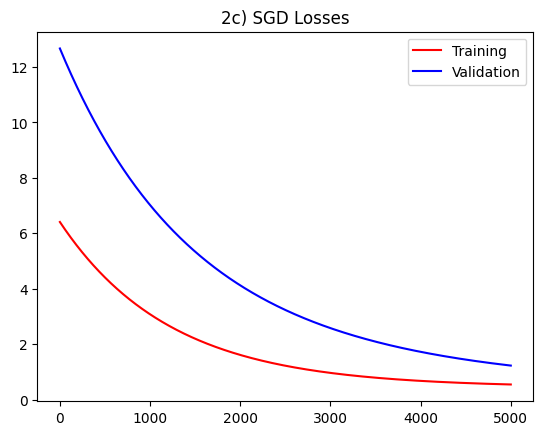

In [262]:
plt.plot(SGD_tl, color = 'red', label = 'Training')
plt.plot(SGD_vl, color = 'blue', label = 'Validation')
plt.title('2c) SGD Losses')
plt.legend()
plt.show()

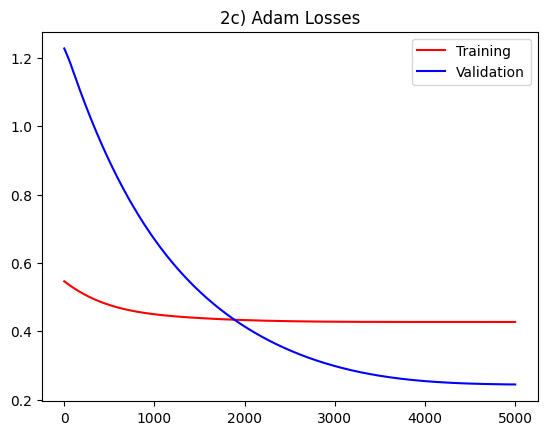

In [263]:
plt.plot(adam_tl, color = 'red', label = 'Training')
plt.plot(adam_vl, color = 'blue', label = 'Validation')
plt.title('2c) Adam Losses')
plt.legend()
plt.show()

In [264]:
inputs = ['area',	'bedrooms', 'bathrooms', 'stories', 'mainroad',	'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
x = ds[inputs].values
y = ds['price'].values
scX = StandardScaler().fit_transform(x)
scY = StandardScaler().fit_transform(y.reshape(-1,1)).flatten()
tx = torch.tensor(scX)
ty = torch.tensor(scY)
n_sam = tx.shape[0]
n_val = int(0.2 * n_sam)
shuf_ind = torch.randperm(n_sam)
train_ind = shuf_ind[:-n_val]
val_ind = shuf_ind[-n_val]
tx_train = tx[train_ind]
ty_train = ty[train_ind]
tx_val = tx[val_ind]
ty_val = ty[val_ind]
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.0001)
model, l_train, l_val  = linTrainLoop3(5000, optimizer, params, tx_train, tx_val, ty_train, ty_val)
SGD_tl = np.array([item.detach().item() for item in l_train])
SGD_vl = np.array([item.detach().item() for item in l_val])

Epochs: 500, 	Training Loss: 11.305097, 	Validation Loss: 0.317235

Epochs: 1000, 	Training Loss: 7.364061, 	Validation Loss: 0.184281

Epochs: 1500, 	Training Loss: 4.877419, 	Validation Loss: 0.109388

Epochs: 2000, 	Training Loss: 3.300972, 	Validation Loss: 0.067265

Epochs: 2500, 	Training Loss: 2.295658, 	Validation Loss: 0.043557

Epochs: 3000, 	Training Loss: 1.649897, 	Validation Loss: 0.030208

Epochs: 3500, 	Training Loss: 1.231426, 	Validation Loss: 0.022741

Epochs: 4000, 	Training Loss: 0.957368, 	Validation Loss: 0.018689

Epochs: 4500, 	Training Loss: 0.775639, 	Validation Loss: 0.016699

Epochs: 5000, 	Training Loss: 0.653396, 	Validation Loss: 0.016024



In [265]:
optimizer = optim.Adam([params], lr=0.0001)
model, l_train, l_val  = linTrainLoop3(5000, optimizer, params, tx_train, tx_val, ty_train, ty_val)
adam_tl = np.array([item.detach().item() for item in l_train])
adam_vl = np.array([item.detach().item() for item in l_val])

Epochs: 500, 	Training Loss: 0.499303, 	Validation Loss: 0.014851

Epochs: 1000, 	Training Loss: 0.428170, 	Validation Loss: 0.023597

Epochs: 1500, 	Training Loss: 0.388388, 	Validation Loss: 0.042434

Epochs: 2000, 	Training Loss: 0.365975, 	Validation Loss: 0.062125

Epochs: 2500, 	Training Loss: 0.353513, 	Validation Loss: 0.076020

Epochs: 3000, 	Training Loss: 0.346369, 	Validation Loss: 0.081829

Epochs: 3500, 	Training Loss: 0.342181, 	Validation Loss: 0.081071

Epochs: 4000, 	Training Loss: 0.339835, 	Validation Loss: 0.077083

Epochs: 4500, 	Training Loss: 0.338677, 	Validation Loss: 0.072697

Epochs: 5000, 	Training Loss: 0.338211, 	Validation Loss: 0.069304



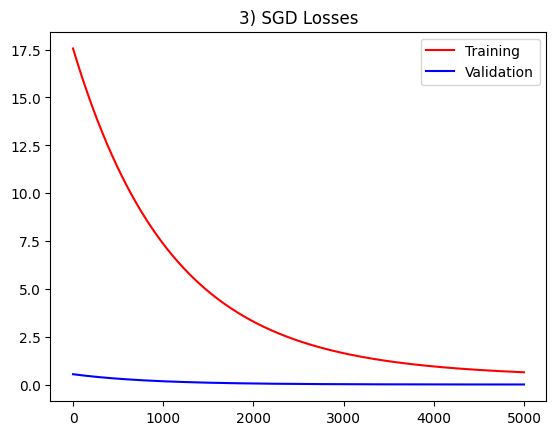

In [271]:
plt.plot(SGD_tl, color = 'red', label = 'Training')
plt.plot(SGD_vl, color = 'blue', label = 'Validation')
plt.title('3) SGD Losses')
plt.legend()
plt.show()

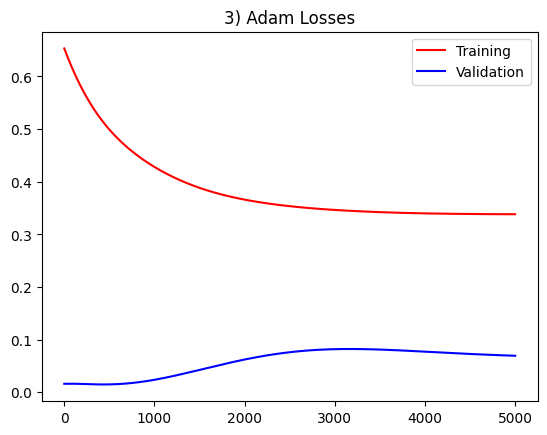

In [273]:
plt.plot(adam_tl, color = 'red', label = 'Training')
plt.plot(adam_vl, color = 'blue', label = 'Validation')
plt.title('3) Adam Losses')
plt.legend()
plt.show()